<a href="https://colab.research.google.com/github/Ridwan1821/TeamGM2/blob/nnaemeka/movie_recommender_system_nnaemeka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Kaggle to Google Collab

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"laskyupgraded","key":"d7168356e9b319752189b16f600a3df1"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31           8832        303  1.0              
googleai/musiccaps                                              MusicCaps                                          793KB  2023-01-25 09:25:48           1711        177  0.9411765        
themrityunjaypathak/most-subscribed-1000-youtube-channels       Most Subscribed 1000 Youtube Channels               28KB  2023-01-21 14:42:05           2180         72  1.0              
nitishsharma01/olympics-124-years-datasettill-2020              O

In [10]:
#download data from kaggle into collab
! kaggle competitions download -c 'EDSA-Movie-Recommendation-Predict'

 98% 234M/239M [00:02<00:00, 95.9MB/s]
100% 239M/239M [00:02<00:00, 104MB/s] 


In [11]:
# make directory named movies and unzip the downloaded file into it
! mkdir movies
! unzip EDSA-Movie-Recommendation-Predict.zip -d movies

Archive:  EDSA-Movie-Recommendation-Predict.zip
  inflating: movies/genome_scores.csv  
  inflating: movies/genome_tags.csv  
  inflating: movies/imdb_data.csv    
  inflating: movies/links.csv        
  inflating: movies/movies.csv       
  inflating: movies/sample_submission.csv  
  inflating: movies/tags.csv         
  inflating: movies/test.csv         
  inflating: movies/train.csv        


**1.** **Introduction**

![](https://miro.medium.com/max/1400/0*NqJrlluUhlcZvGTx)

The [recommender system](https://en.wikipedia.org/wiki/Recommender_system) is a data science algorithm we employ to suggest items to users of a platform based on their product preferences or personal lifestyle. Recommender systems are particularly useful when an individual needs to choose an item from a potentially overwhelming number of items that a service may offer.

From Facebook, Amazon, DataQuest down to every e-commerce website, recommender systems are used to suggest a new friend, what product a customer might like or another course a student should sign up for.

**1.2** **Problem Statement**

In this challenge, we want to build a Collaborative Filtering model that will effectively recommend best movies to a customer based on their personal preferences.

**1.3 The Dataset**

For this challenge, we have been provided with a pack of dateset with millions of movie data. 

# **2.** **Libraries and Dataset**



**2.1 Import required libraries**

We import inbuilt python libraries to help us with the task.

In [12]:
#import data manipulation libraries
import pandas as pd
import numpy as np
import scipy as sp

#import data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning tools
from sklearn.preprocessing import StandardScaler

from nltk.stem import WordNetLemmatizer, SnowballStemmer
snowball = SnowballStemmer(language = 'english')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, wordcloud_cli

import datetime


# **2.2 Load Datasets**

**2.2.1 genome scores data**

In [13]:
# Load genome scores data
gs = pd.read_csv('movies/genome_scores.csv')

#check number of rows and columns availbale
print('Rows -', gs.shape[0], '\nColumns -', gs.shape[1], '\n')

gs.head()

Rows - 15584448 
Columns - 3 



,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


**2.2.2 genome tags data**

In [14]:
gt = pd.read_csv('movies/genome_tags.csv')

#check number of rows and columns availbale
print('Rows -', gt.shape[0], '\nColumns -', gt.shape[1], '\n')

gt.head()

Rows - 1128 
Columns - 2 



,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


**2.2.3 IMDB data**

In [87]:
imd = pd.read_csv('movies/imdb_data.csv')
imdc = pd.read_csv('movies/imdb_data.csv')
#check number of rows and columns availbale
print('Rows -', imd.shape[0], '\nColumns -', imd.shape[1], '\n')

imd.head()

Rows - 27278 
Columns - 6 



,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [16]:
# check count of observations and presence of missing values
imd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


The `imd.info()` check above reveals the `imd` data has missing values in the `title_cast`, `director`, `runtime`, `budeget` and `plot_keywords` columns.

**2.2.4 links dataset**

In [17]:
# load links dataset
ld = pd.read_csv('movies/links.csv')
ld.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**2.2.5 movies meta dataset**

In [18]:
# load movies dataset
mv = pd.read_csv('movies/movies.csv')
mv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
mv.shape

(62423, 3)

**2.2.6 sample submission file**

Let's a sample file for making the challenge submission.

In [20]:
ss = pd.read_csv('movies/sample_submission.csv')
ss.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


**2.2.7 tags data**

In [21]:
#load the tags dataset
tg = pd.read_csv('movies/tags.csv')
tg.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [22]:
# check for missing values in the data
tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


Only the `tag` column has missing data - very insignificant count at first glance.

In [23]:
# missing values < 0.01%
((len(tg) - tg.tag.count())/len(tg)) * 100

0.0014633789419770248

**2.2.8 test data**

In [24]:
#load test data
ts = pd.read_csv('movies/test.csv')
ts.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [25]:
# create a column of userId and movieId
#ts['user_movie'] = ts.apply(lambda x: '%s_%s' %(x['userId'], x['movieId']), axis = 1)





**2.2.9 train data**

In [26]:
tr = pd.read_csv('movies/train.csv')
tr.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# **3. Exploratory Data Analysis**

**3.1.1 genome scores data**

In [27]:
# check data details
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [28]:

# percentage missing values
gs.isnull().mean()

movieId      0.0
tagId        0.0
relevance    0.0
dtype: float64

In [29]:
# summary statistics of data
gs.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,15584448.0,46022.487261,55352.211318,1.00000,3853.750,8575.5000,80186.50000,206499.0
tagId,15584448.0,564.500000,325.625434,1.00000,282.750,564.5000,846.25000,1128.0
relevance,15584448.0,0.116368,0.154472,0.00025,0.024,0.0565,0.14075,1.0





**3.1.2 genome tags**


In [30]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


genome tags data has no missing values.

In [31]:
# summary statistics
gt.describe().T

,count,mean,std,min,25%,50%,75%,max
tagId,1128.0,564.5,325.769857,1.0,282.75,564.5,846.25,1128.0


**3.1.3 imbd data**

In [32]:
# check data details
imd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [33]:
# evaluate percentage missing values
imd.isnull().mean()*100

movieId           0.000000
title_cast       36.908864
director         36.197668
runtime          44.317765
budget           71.016937
plot_keywords    40.611482
dtype: float64

We found lots of columns with missing values in the IMBD data; we will drop columns with missing entries in `title`, `director`, `plot keywords`.
Below, over 36% of entries are missing in the `title` and `director` columns, we will drop such observations.

In [34]:
# summary statistics
imd.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,27278.0,59855.480570,44429.314697,1.0,6931.25,68068.0,100293.25,131262.0
runtime,15189.0,100.312331,31.061707,1.0,89.00,98.0,109.00,877.0


In [35]:
# drop missing data in title, director columns
imd = imd.dropna(subset=['title_cast', 'director', 'plot_keywords']) 

In [36]:
# input missing values with average runtime for the director
imd['runtime'].fillna(imd.groupby('director')['runtime'].mean()[0], inplace=True)

The `budget` feature is redundant for this exercise; hence it will be dropped.

In [37]:
# drop the budget column
imd = imd.drop('budget', axis = 1)

In [38]:
# confirm data information
imd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16041 entries, 0 to 27277
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        16041 non-null  int64  
 1   title_cast     16041 non-null  object 
 2   director       16041 non-null  object 
 3   runtime        16041 non-null  float64
 4   plot_keywords  16041 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 751.9+ KB


In [39]:
imd.head(2)

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game


In [40]:


def clean_char(data):
    data = data.replace(' ', '_')
    data = data.replace('|', ' ')
    return data

# clean title cast column
imd['title_cast'] = imd['title_cast'].apply(clean_char)
imd.head(2)

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom_Hanks Tim_Allen Don_Rickles Jim_Varney Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin_Williams Jonathan_Hyde Kirsten_Dunst Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game


In [41]:
# clean title cast column
imd['director'] = imd['director'].apply(clean_char)
imd.head(2)

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom_Hanks Tim_Allen Don_Rickles Jim_Varney Wal...,John_Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin_Williams Jonathan_Hyde Kirsten_Dunst Bra...,Jonathan_Hensleigh,104.0,board game|adventurer|fight|game


In [42]:
# clean key words
def clean_char2(data):
    data = data.replace('|', ' ')
    return data

imd['plot_keywords'] = imd['plot_keywords'].apply(clean_char2)
imd.head()

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom_Hanks Tim_Allen Don_Rickles Jim_Varney Wal...,John_Lasseter,81.0,toy rivalry cowboy cgi animation
1,2,Robin_Williams Jonathan_Hyde Kirsten_Dunst Bra...,Jonathan_Hensleigh,104.0,board game adventurer fight game
2,3,Walter_Matthau Jack_Lemmon Sophia_Loren Ann-Ma...,Mark_Steven_Johnson,101.0,boat lake neighbor rivalry
3,4,Whitney_Houston Angela_Bassett Loretta_Devine ...,Terry_McMillan,124.0,black american husband wife relationship betra...
4,5,Steve_Martin Diane_Keaton Martin_Short Kimberl...,Albert_Hackett,106.0,fatherhood doberman dog mansion


Remove names that are not directors e.g. William Shakespeare, See full summary etc.

In [91]:
imd = imd[~imd.director.isin(['See full summary', 'William Shakespeare'])]


**3.1.4 movie meta dataset**

In [92]:
mv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
# check data information
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [94]:
# clean genres column
mv['genres'] = mv['genres'].apply(clean_char2)
mv.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy


None of the columns in the `movies` meta dataset has missing values.

**3.1.5 links data**

In [95]:
# check for missing data
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


**3.1.6 train data**

In [96]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [97]:
# percentage null values
tr.isnull().mean()

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

There are no null values in the `train` data.

**3.1.7 test data**

In [98]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [99]:
# percentage missing values
ts.isnull().mean()

userId     0.0
movieId    0.0
dtype: float64

**3.2 Joining related datasets - IMBD and movies**

**3.2.1 Merge IMBD with movies meta data to IMBD movies**

In [100]:
# recall imbd movies
print('Rows -', imd.shape[0], '\nColumns -', imd.shape[1], '\n')
imd.head(2)

Rows - 27231 
Columns - 6 



,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [101]:
# recall movies meta data
print('Rows -', mv.shape[0], '\nColumns -', mv.shape[1], '\n')
mv.head(2)

Rows - 62423 
Columns - 3 



,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy


In [102]:
# inner join IMBD and movies data
mv_imd = imd.merge(mv, on = 'movieId')

#check number of rows and columns availbale
print('Rows -', mv_imd.shape[0], '\nColumns -', mv_imd.shape[1], '\n')

mv_imd.head(2)

Rows - 24823 
Columns - 8 



,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure Children Fantasy


**3.2.2 Adding tags and genome data**

In [103]:
# check tags
print('Rows -', tg.shape[0], '\nColumns -', tg.shape[1], '\n')
tg.head(2)

Rows - 1093360 
Columns - 4 



,userId,movieId,tag,timestamp
0,3,260,classic,1970-01-01
1,3,260,sci-fi,1970-01-01


In [104]:
# Check genome
print('Rows -', mv.shape[0], '\nColumns -', mv.shape[1], '\n')
gs.head(2)

Rows - 62423 
Columns - 3 



,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


In [105]:
mv_imd_tag = mv_imd.merge(tg, on = 'movieId', how = 'inner')

print('Number of movies with tag -', mv_imd_tag.shape[0])
print('\n')
display(mv_imd_tag.isnull().sum())


Number of movies with tag - 902103




movieId               0
title_cast       227000
director         226123
runtime          240289
budget           318248
plot_keywords    229303
title                 0
genres                0
userId                0
tag                  16
timestamp             0
dtype: int64

In [106]:
'''mv_imd_tag = mv_imd_tag.merge(gs_t, on = 'movieId', how = 'left')

print('Number of movies with genome tag and scores -', mv_imd_tag.shape[0])
print('\n')
display(mv_imd_tag.isnull().sum())'''
mv_imd_tag.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,userId,tag,timestamp
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,791,Owned,1970-01-01
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1048,imdb top 250,1970-01-01
2,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1361,Pixar,1970-01-01
3,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3164,Pixar,1970-01-01
4,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3164,time travel,1970-01-01


**3.2.3 Add to train dataset**

In [107]:
# check shape of train data
ts.shape

(5000019, 2)

In [108]:
train = pd.merge(ts, imd, on='movieId', how ='inner')
print(train.shape[0])
train.isnull().sum()

4808247


userId                 0
movieId                0
title_cast       1301936
director         1301115
runtime          1326029
budget           1574199
plot_keywords    1304596
dtype: int64

In [109]:
# convert to datetime
tg['timestamp']= pd.to_datetime(tg['timestamp']) 

tg.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1970-01-01
1,3,260,sci-fi,1970-01-01
2,4,1732,dark comedy,1970-01-01
3,4,1732,great dialogue,1970-01-01
4,4,7569,so bad it's good,1970-01-01


In [110]:
tg['timestamp']= tg['timestamp'].dt.strftime('%Y-%m-%d')


In [111]:
tg['timestamp'].unique()

array(['1970-01-01'], dtype=object)

In [112]:
#tg.shape[0]
#train = pd.merge(train, tg, on='movieId', how ='inner')
train.isnull().sum()

userId                 0
movieId                0
title_cast       1301936
director         1301115
runtime          1326029
budget           1574199
plot_keywords    1304596
dtype: int64

**3.3 Exploring the merger data**

**3.2.1 Number of Movies Rated per User**

In [113]:
# Number of movies per user
idx_otl = mv_imd_tag.groupby(by='userId')['movieId'].count().sort_values(ascending = False).nlargest(49).index
#idx_otl.to_list()

#without outliers
mv_imd_out = mv_imd_tag[mv_imd_tag['userId'].isin(idx_otl.to_list())]

mv_imd_no = mv_imd_tag[~mv_imd_tag['userId'].isin(idx_otl.to_list())]

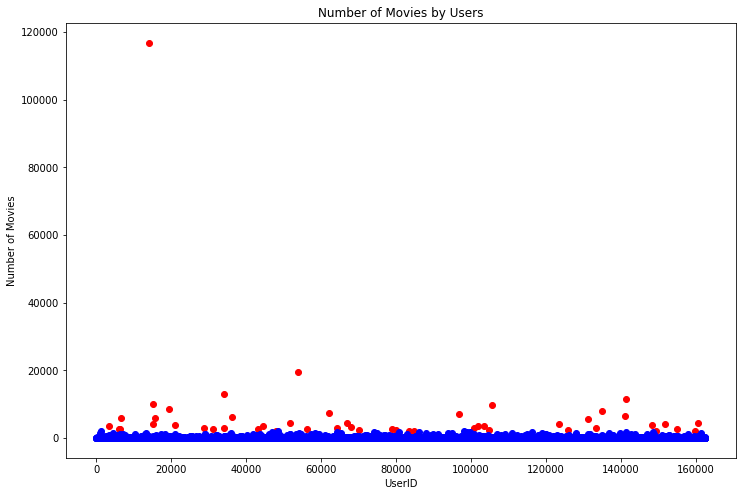

In [114]:

plt.figure(figsize=(12, 8))
plt.scatter(mv_imd_out.userId.unique(), mv_imd_out.groupby(by = 'userId')['movieId'].count(),marker ="o", c ="red")
plt.scatter(mv_imd_no.userId.unique(), mv_imd_no.groupby(by = 'userId')['movieId'].count(), marker ="o", c ="blue")
plt.xlabel('UserID')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Users')

plt.show()

The scatter plot is showing that a particular user rated close to 70,000 movies. This doesnt look real; we consider an outlier and hence will remove the noise from the analysis.

In [115]:
mv_imd_tag.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,userId,tag,timestamp
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,791,Owned,1970-01-01
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1048,imdb top 250,1970-01-01


**3.3.1 Top 10 Directors with Most movies**

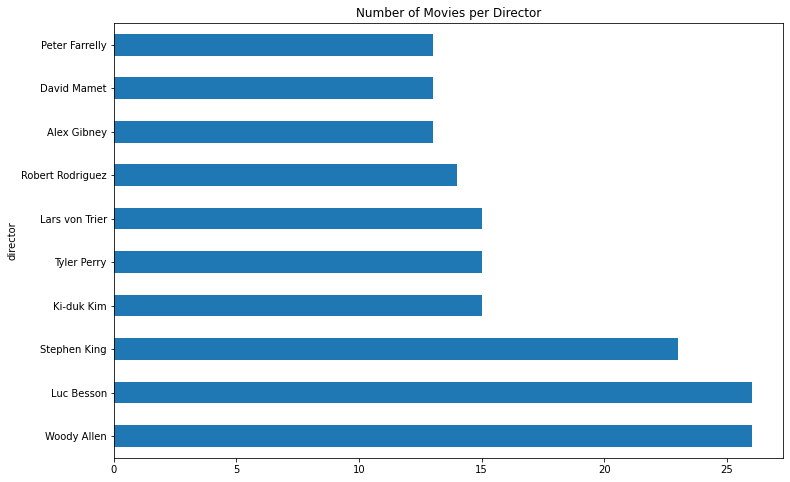

In [118]:
plt.figure(figsize=(12, 8))
(mv_imd.groupby('director')['movieId'].count()
 .sort_values(ascending=False).nlargest(10).plot.barh())
plt.title('Number of Movies per Director')
plt.show()

In [117]:
#list(imdc['director'].unique())

Some labels in the chart above are not actual directors. Example: "william_shakespeare", "see_full_summary". We will remove such labels and associated entries.

In [119]:
import nltk
nltk.download('wordnet')
#

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [120]:
wn = WordNetLemmatizer()

In [123]:
from nltk.corpus import stopwords

In [ ]:
stopword = set(stopwords.words('english'))


In [ ]:
def join_words(text):
  text = (' '.join([word for word in text.split(' ') if word not in stopwords]))
  text = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in text.split(' ')])
  return text

In [ ]:
item = mv_mid['genres']
text = ' '.join(word for word in item.apply(join_words))
wordclound = WordCloud(stopwords=set( STOPWORDS), background_color = 'black', max_word=50).generate(text)
plt.figure(figsize(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Genre')
plt.show()